In [1]:
from src.utils import *
from sklearn.linear_model import LogisticRegression
from os import listdir
from pathlib import Path
import pandas as pd
from src.utils import isc_data_preparation

In [2]:
def drop_all_missing_ids(df):
    # Group by id and check if all values for an id are missing
    missing_groups = df.groupby('pid')['mother'].apply(lambda x: x.isna().all())
    
    # Get ids that have all missing values
    ids_to_drop = missing_groups[missing_groups].index
    
    # Drop those ids from the dataset
    df_cleaned = df[~df['pid'].isin(ids_to_drop)]
    
    return df_cleaned.copy()

In [3]:
def drop_all_missing_ids_emp(df):
    # Group by id and check if all values for an id are missing
    missing_groups = df.groupby('pid')['employed7'].apply(lambda x: x.isna().all())
    
    # Get ids that have all missing values
    ids_to_drop = missing_groups[missing_groups].index
    
    # Drop those ids from the dataset
    df_cleaned = df[~df['pid'].isin(ids_to_drop)]
    
    return df_cleaned.copy()

In [4]:
df = pd.read_csv('./GSOEP_2.csv')
wdf = df[df.female == 1]

In [5]:
df.columns

Index(['pid', 'syear', 'age', 'age_squared', 'meanage', 'centered_age',
       'meanage_squared', 'centered_age_squared', 'female', 'employed7',
       'kage', 'mother', 'mother_year', 'children', 'log_trim_m_wage1',
       'log_trim_hourly_wage1', 'trim_m_wage1', 'trim_hourly_wage1', 'g_level',
       'v_level', 'gv_level', 'no_qual', 'level1_acad', 'level1_vet',
       'level2_acad', 'level2_vet', 'level3_acad', 'level3_vet', 'level4_acad',
       'level4_vet', 'vet', 'partner2', 'occupation', 'manager',
       'professionals', 'technicians', 'clerks', 'service_worker',
       'agri_worker', 'craft_worker', 'machine_operator',
       'elementary_occupation', 'good_health', 'migration_status',
       'no_migback', 'second_generation', 'migrant', 'west', 'full_time',
       'public_sector'],
      dtype='object')

In [6]:
mydata = wdf[['trim_m_wage1', 'employed7', 'pid', 'syear', 'mother', 'mother_year', 'vet']]
mydata['mother'] = mydata['mother'].replace({'Mother': 1, 'No-mother': 0})
mydata = mydata.reset_index(drop=True)

/tmp/ipykernel_46973/979844115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['mother'] = mydata['mother'].replace({'Mother': 1, 'No-mother': 0})


In [7]:
mydata

,trim_m_wage1,employed7,pid,syear,mother,mother_year,vet
0,NaN,0.0,102,1984,1.0,0.0,Academic
1,NaN,0.0,102,1985,1.0,0.0,Academic
2,NaN,0.0,102,1986,1.0,0.0,Academic
3,NaN,0.0,102,1987,1.0,0.0,Academic
4,NaN,0.0,102,1988,1.0,0.0,Academic
...,...,...,...,...,...,...,...
550525,NaN,NaN,39238701,2018,0.0,0.0,NaN
550526,NaN,0.0,39238704,2017,NaN,NaN,NaN
550527,NaN,NaN,39238704,2018,NaN,NaN,NaN
550528,NaN,NaN,39238705,2017,NaN,NaN,NaN


In [8]:
len(mydata.pid.unique())

70768

In [9]:
mydata['mother'].isnull().sum()

np.int64(100118)

In [10]:
mydata = drop_all_missing_ids(mydata)
mydata = drop_all_missing_ids_emp(mydata)

In [11]:
mydata['mother'].isnull().sum()

np.int64(0)

In [12]:
len(mydata.pid.unique())

48938

In [13]:
mydata['treated'] = mydata['mother']
mydata['ever_treated'] = mydata.groupby('pid')['treated'].transform(any).values
mydata['year'] = mydata['syear']
mydata['employed'] = mydata['employed7']

In [14]:
mydata = mydata.dropna(subset=['employed7']).copy()
mydata = mydata.dropna(subset=['trim_m_wage1']).copy()

In [15]:
treated_f = mydata[mydata.ever_treated==True].copy()
control_f = mydata[(mydata.ever_treated==False) & (mydata.mother==0)].copy()

In [16]:
len(treated_f.pid.unique())

18761

In [17]:
print(set(control_f.pid.unique()) & set(treated_f.pid.unique()))
common_elements = [item for item in control_f.pid.unique() if item in treated_f.pid.unique()]
print(any(common_elements))

set()
False


In [18]:
mydata.trim_m_wage1.isnull().sum()

np.int64(0)

In [19]:
mydata

,trim_m_wage1,employed7,pid,syear,mother,mother_year,vet,treated,ever_treated,year,employed
76,520.35620,1.0,602,1999,1.0,0.0,Academic,1.0,True,1999,1.0
82,235.57124,1.0,602,2005,1.0,0.0,Academic,1.0,True,2005,1.0
83,232.01857,1.0,602,2006,1.0,0.0,Academic,1.0,True,2006,1.0
84,228.31050,1.0,602,2007,1.0,0.0,Academic,1.0,True,2007,1.0
85,223.21429,1.0,602,2008,1.0,0.0,Academic,1.0,True,2008,1.0
...,...,...,...,...,...,...,...,...,...,...,...
550390,199.00497,1.0,39221101,2017,0.0,0.0,NaN,0.0,True,2017,1.0
550464,447.76120,1.0,39233501,2017,1.0,0.0,Academic,1.0,True,2017,1.0
550487,901.96082,1.0,39235601,2018,1.0,0.0,Vocational,1.0,True,2018,1.0
550490,717.41296,1.0,39235801,2017,1.0,0.0,NaN,1.0,True,2017,1.0


In [20]:
conds = {
    'dropna': False,
    'employed': False,
    'target_var': 'trim_m_wage1',
    'min_treat_waves': 1,
    'min_waves_pretreat': 3
}
treated, control = isc_data_preparation(mydata, conds)

In [21]:
len(treated.pid.unique())

1129

In [22]:
treated

,trim_m_wage1,employed7,pid,syear,mother,mother_year,vet,treated,ever_treated,year,employed,year_reindex,year_treated,year_treat_reindex,initial_year,reindex,years_treated
165,417.67557,1.0,6003,2003,0.0,0.0,Academic,0.0,True,2003,1.0,1,2018,12,2003,-11,1.0
166,413.17368,1.0,6003,2004,0.0,0.0,Academic,0.0,True,2004,1.0,2,2018,12,2003,-10,1.0
167,1972.15780,1.0,6003,2006,0.0,0.0,Academic,0.0,True,2006,1.0,3,2018,12,2003,-9,1.0
168,2713.47050,1.0,6003,2007,0.0,0.0,Vocational,0.0,True,2007,1.0,4,2018,12,2003,-8,1.0
169,3079.24120,1.0,6003,2008,0.0,0.0,Vocational,0.0,True,2008,1.0,5,2018,12,2003,-7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143276,2843.13720,1.0,35014602,2018,1.0,0.0,Vocational,1.0,True,2018,1.0,4,2017,3,2013,1,2.0
143282,2574.66550,1.0,35019002,2013,0.0,0.0,Vocational,0.0,True,2013,1.0,1,2015,3,2013,-2,2.0
143283,3248.73100,1.0,35019002,2014,0.0,0.0,Vocational,0.0,True,2014,1.0,2,2015,3,2013,-1,2.0
143284,2613.06540,1.0,35019002,2015,1.0,1.0,Vocational,1.0,True,2015,1.0,3,2015,3,2013,0,2.0


In [23]:
treated.to_csv("clean_t.csv")
control.to_csv("clean_c.csv")

In [24]:
import pandas as pd
from src.utils import get_control_clean
from src.isc_lib import isc
import warnings
warnings.filterwarnings("ignore")


def get_intertisial_data(clean_t, clean_c, target_var):
    treated = pd.read_csv(clean_t, index_col=0)
    controls = pd.read_csv(clean_c, index_col=0)
    target_var = target_var
    samples = get_control_clean(controls, treated,
                                [target_var,
                                'employed',],
                                target_var)
    return samples


def run_isc(clean_t, clean_c, target_var, out_suffix, k_n=35, placebo=False):
    print(f'Getting data for {target_var}_{out_suffix}...')
    samples = get_intertisial_data(clean_t, clean_c, target_var)
    print('DONE')
    print(f'Running ISC for {target_var}_{out_suffix}...')
    out = isc(samples, penalized=True, reduction=True, k_n=k_n, placebo=placebo)
    print('DONE')
    print('Saving Data...')
    diffs = pd.concat(out['diffs'], axis=1).sort_index()
    #w_diffs = pd.concat(out['w_diffs'], axis=1).sort_index()
    treats = pd.concat(out['treats'], axis=1).sort_index()
    #w_treats = pd.concat(out['w_treats'], axis=1).sort_index()
    synths = pd.concat(out['synths'], axis=1).sort_index()
    #w_synths = pd.concat(out['w_synths'], axis=1).sort_index()
    boots_vars = pd.concat(out['boots_vars'], axis=1).mean(axis=1).sort_index()
    #placebo_avs = pd.concat(out['placebo_avs'], axis=1).sort_index()
    diffs.to_csv(f'./outputs/diffs_{target_var}_{out_suffix}.csv')
    #w_diffs.to_csv(f'./outputs/w_diffs_{target_var}_{out_suffix}.csv')
    treats.to_csv(f'./outputs/treats_{target_var}_{out_suffix}.csv')
    #w_treats.to_csv(f'./outputs/w_treats_{target_var}_{out_suffix}.csv')
    synths.to_csv(f'./outputs/synths_{target_var}_{out_suffix}.csv')
    #w_synths.to_csv(f'./outputs/w_synths_{target_var}_{out_suffix}.csv')
    boots_vars.to_csv(f'./outputs/boots_vars_{target_var}_{out_suffix}.csv')
    #placebo_avs.to_csv(f'./outputs/placebo_avs_{target_var}_{out_suffix}.csv')
    print('DONE')
    return 0


run_isc('clean_t.csv', 'clean_c.csv', 'trim_m_wage1', 'gen', 5, False)



Getting data for trim_m_wage1_gen...
DONE
Running ISC for trim_m_wage1_gen...


100%|██████████| 1012/1012 [01:32<00:00, 10.92it/s]


DONE
Saving Data...
DONE


0

In [25]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
mpl.rc('font', family='Liberation Sans')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def bootstrap(data, num_iterations):
    boot_means = []
    for _ in range(num_iterations):
        num_samples = len(data.dropna())
        try:
            sample = np.random.choice(data.dropna(), size=num_samples, replace=True)
            boot_means.append(np.mean(sample))
        except ValueError:
            boot_means.append(np.nan)
    return boot_means


def ci_bootstrap(df, low_lim, high_lim, num_iterations = 1000):
    #df = pd.read_csv(path_to_data, index_col=0)
    bootstrap_results = {row: bootstrap(df.loc[row], num_iterations) for row in df.index}
    quantiles = {row: (np.percentile(bootstrap_results[row], low_lim), np.percentile(bootstrap_results[row], high_lim)) for row in df.index}
    quantiles_df = pd.DataFrame(quantiles, index=['low_ci', 'high_ci']).T
    return quantiles_df


def plot_dv(path_to_data, low_lim, high_lim, num_iterations, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)
    differences.mean(axis=1).plot(color=colors[0], ax=ax)
    ci_boots = ci_bootstrap(differences, low_lim, high_lim, num_iterations)
    ax.axvline(x=0, linestyle='dotted', color=colors[2])
    ax.axhline(y=0, linestyle='dotted', color=colors[2])
    ax.fill_between(x=differences.index,
                 y1=ci_boots.high_ci,
                 y2=ci_boots.low_ci,
                     color='grey', alpha=0.2, hatch='//')
    ax.yaxis.set_major_formatter('£{x:1.2f}')
    #ax.yaxis.set_major_formatter('{x:1.0f}%')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine()

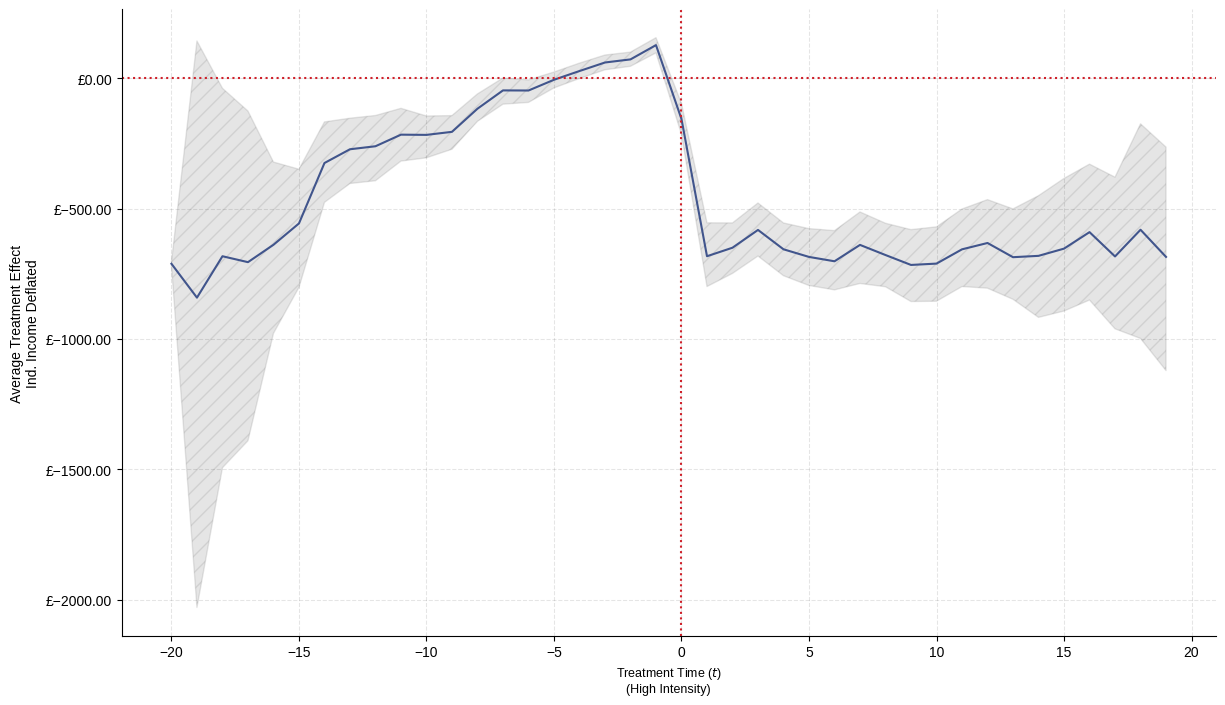

In [26]:
path1 = '/home/daniel/code/motherhood/outputs/diffs_trim_m_wage1_gen.csv'

varname = 'Ind. Income Deflated'
mpl.rc('font', family='Liberation Sans')


fig, ax = plt.subplots(figsize=(12, 7),
                        layout="constrained")
plot_dv(path1, 2.5, 97.5, 1000, ax)

ax.set_ylabel(' Average Treatment Effect \n' + varname)
ax.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
plt.show()